## Notebook 2- Practice with Scikit Learn

Churn Calls dataset:  

### Import Standard Packages

In [93]:
#Add packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load anything relating to my machine learning model yet (i.e. decision tree). I will do that as I use them.

### a)	Read in the Churn Calls dataset (5,000 observations). 

In [94]:
%pwd

'C:\\Users\\ibrah\\OneDrive\\Documents\\AData_Analytics\\BIA-6303PredModels\\BI6303-predictivesModels\\module1\\data'

In [95]:
cd C:\\Users\\ibrah\\OneDrive\\Documents\\AData_Analytics\\BIA-6303PredModels\\BI6303-predictivesModels\\module1\\data

C:\Users\ibrah\OneDrive\Documents\AData_Analytics\BIA-6303PredModels\BI6303-predictivesModels\module1\data


### b)	Call the data frame Churn.

In [96]:
#import Using Pandas 
#Because of errors msg, we'll use the encoding 'ISO-8859-1' or 'latin'
churn=pd.read_csv("Churn_Calls.csv", encoding='latin-1', engine='python')


In [97]:
churn.head(7)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no
5,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1,no
6,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1,no


In [98]:
churn.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4995,WY,171,area_code_415,no,no,0,231.2,135,39.30,188.7,74,16.04,206.9,124,9.31,12.3,1,3.32,1,no
4996,WY,177,area_code_415,no,no,0,175.7,120,29.87,168.6,90,14.33,198.9,110,8.95,14.6,4,3.94,1,no
4997,WY,185,area_code_415,yes,yes,30,154.1,114,26.20,118.7,106,10.09,258.4,105,11.63,12.9,3,3.48,2,no
4998,WY,215,area_code_510,no,no,0,83.6,148,14.21,120.9,91,10.28,226.6,110,10.20,10.7,9,2.89,0,no
4999,WY,225,area_code_415,no,no,0,182.7,142,31.06,246.5,63,20.95,218.0,103,9.81,8.8,2,2.38,1,no


### Descriptive Analysis

In [99]:
churn.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [100]:
churn.shape # rows/observations; columns/variables

(5000, 20)

In [101]:
churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [102]:
print("Column Names", churn.columns) #Here I am using both the print function (or method) and columns function (or attribute)

Column Names Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


### c)	Set the target variable as Churn (a yes/no variable). 

In [103]:
# designate target variable name
targetVar = 'churn'
#print(targetVar)
targetSeries = churn[targetVar] #notice one column is considered a series in pandas
#print(targetSeries)
#remove target from current location and insert in column number 0
del churn[targetVar]
churn.insert(0, targetVar, targetSeries)
#reprint dataframe and see target is in position 0
churn.head(10)


,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0
5,no,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1
6,no,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1
7,no,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2
8,no,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2
9,no,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


#### Remove columns state and area_code

In [104]:
#axis=1 denotes that we are referring to a column, not a row
churn=churn.drop(['state', 'area_code'], axis=1)

churn.head(10)

,churn,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,1,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,36,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,36,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,41,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,42,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0
5,no,48,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1
6,no,50,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1
7,no,51,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2
8,no,52,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2
9,no,52,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


### d) EDA & Data Preprocessing

In [105]:
loyal_customers = churn[churn['churn'] == "no"]
disloyal_customers = churn[churn['churn'] == "yes"]
loyal_customers.head(6)

,churn,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,1,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,36,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
3,no,41,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,42,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0
5,no,48,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1
6,no,50,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1


churn
no     4293
yes     707
Name: churn, dtype: int64


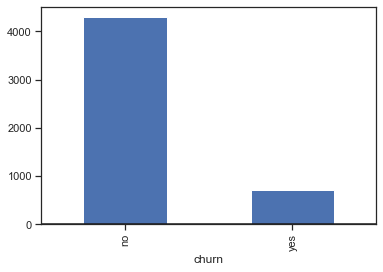

In [106]:
#Basic bar chart since the target is binominal
groupby = churn.groupby(targetVar)
targetEDA=groupby[targetVar].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

#### Calculate the churn rate:

In [107]:
nb_customers = len(churn.index)
print('There are a total of %s customers in the dataset among which %s left within the last month.' 
      %(nb_customers, churn[churn['churn'] == "yes"].shape[0]))
churnNB = churn['churn'].value_counts()[1]
churnrate = float(churnNB) / nb_customers
print('The churn rate is {:.2f}%'.format(churnrate*100))

There are a total of 5000 customers in the dataset among which 707 left within the last month.
The churn rate is 14.14%


### Histograms

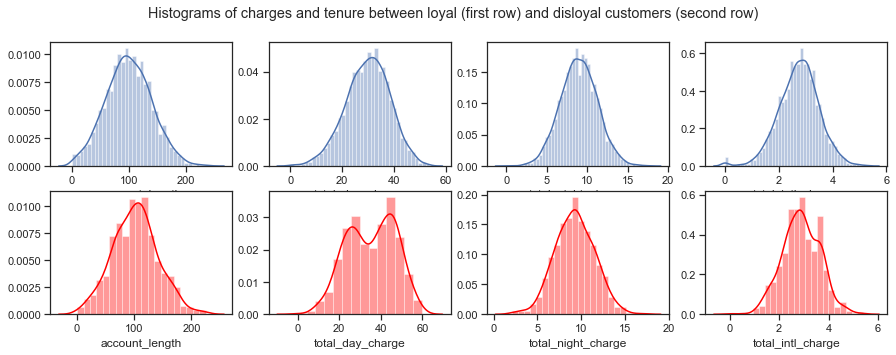

In [108]:
dims = (15, 5)
fig, ax =plt.subplots(2,4,figsize=dims)
plt.suptitle('Histograms of charges and tenure between loyal (first row) and disloyal customers (second row) ')
#loyal customers
sns.distplot(loyal_customers.account_length, ax=ax[0, 0])
sns.distplot(loyal_customers.total_day_charge, ax=ax[0, 1])
sns.distplot(loyal_customers.total_night_charge, ax=ax[0,2])
sns.distplot(loyal_customers.total_intl_charge, ax=ax[0,3])

#disloyal customers
sns.distplot(disloyal_customers.account_length, ax=ax[1, 0], color='red')
sns.distplot(disloyal_customers.total_day_charge, ax=ax[1, 1], color='red')
sns.distplot(disloyal_customers.total_night_charge, ax=ax[1,2], color='red')
sns.distplot(disloyal_customers.total_intl_charge, ax=ax[1,3], color='red')
plt.savefig('charges_and_tenure.jpg')

The above histograms present the tenure, total day charge, total night charge and total international charge for loyal customer(1st row) and disloyal customer(2nd row). 

In [109]:
print("Proportion of international plan in whole database %s" 
      %(churn.international_plan.value_counts().values / churn.shape[0]))
print("Proportion of international plan among loyal customers %s" 
      %(loyal_customers.international_plan.value_counts().values / loyal_customers.shape[0]))
print("Proportion of internationalp lan disloyal customers %s" 
      %(disloyal_customers.international_plan.value_counts().values / disloyal_customers.shape[0]))

Proportion of international plan in whole database [0.9054 0.0946]
Proportion of international plan among loyal customers [0.93617517 0.06382483]
Proportion of internationalp lan disloyal customers [0.718529 0.281471]


In [110]:
print("Proportion of international_plan in whole database %s" 
      %(churn.voice_mail_plan.value_counts().values / churn.shape[0]))
print("Proportion of international_plan among loyal customers %s" 
      %(loyal_customers.voice_mail_plan.value_counts().values / loyal_customers.shape[0]))
print("Proportion of international_plan disloyal customers %s" 
      %(disloyal_customers.voice_mail_plan.value_counts().values / disloyal_customers.shape[0]))

Proportion of international_plan in whole database [0.7354 0.2646]
Proportion of international_plan among loyal customers [0.71558351 0.28441649]
Proportion of international_plan disloyal customers [0.85572843 0.14427157]


In [2]:
churn.boxplot('total_intl_calls', 'international_plan', rot = 30,figsize=(5,6))

NameError: name 'attrition_df' is not defined

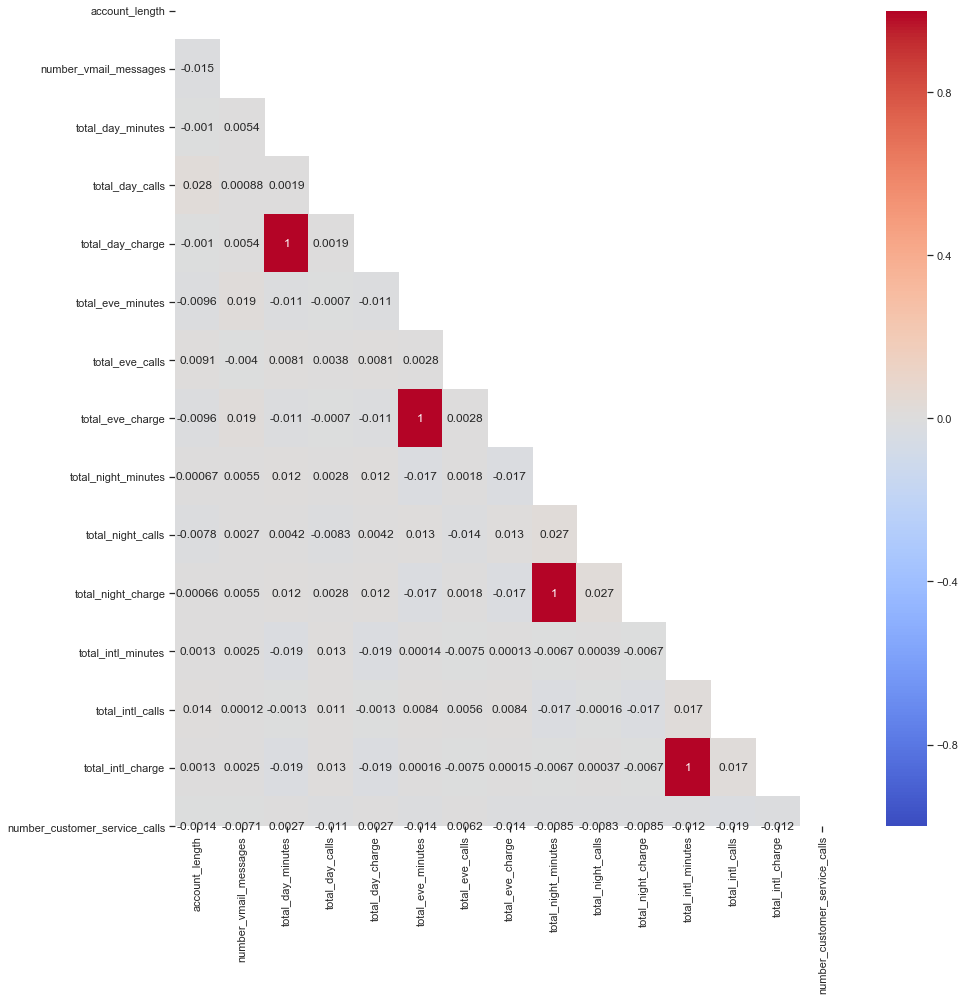

In [112]:
#correlation matrix
corr = churn.corr()

#plot using seaborn library
plt.figure(figsize=(15,15))
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr, 
           annot=True,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           mask=mask)
plt.show()

The following features are highly positively correlated: total night charge and total night minutes, total evening charge and total evening minutes, total day charge and total day minutes, total international minutes and total international calls.
    

To deal with the collinearity I choose to drop some of the highly correlated independent variables.

In [113]:
churn=churn.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'],axis=1)
churn.shape

(5000, 14)

### e)	Transform the data so factors are dummied and missing values (if any) are fixed.

We are going to do two preprocessing tasks: 1) change the target column to a numeric since many models in Scikit Learn requires integers/numeric; and 2) create dummy variables for the categorical variables. 

In [114]:
# This code turns a character/text target variable into numeric one
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
churn['churn'] = le_dep.fit_transform(churn['churn'])

In [115]:
# perform data transformation. Creates dummy variables for categorical variables. 
for col in churn.columns[1:]:
	attName = col
	dType = churn[col].dtype
	missing = pd.isnull(churn[col]).any()
	uniqueCount = len(churn[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		churn = pd.concat([churn, pd.get_dummies(churn[col], prefix=col)], axis=1)
		del churn[attName]

In [116]:
churn.shape

(5000, 16)

In [117]:
churn.head()

,churn,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0,1,0,74,29.78,79,12.89,109,10.37,3,1.43,1,1,0,1,0
1,0,36,30,128,24.87,80,13.81,109,5.82,6,3.92,0,1,0,0,1
2,1,36,19,96,29.22,111,16.86,76,14.48,1,2.84,1,0,1,0,1
3,0,41,0,66,27.08,75,10.70,76,11.79,5,3.00,1,1,0,1,0
4,0,42,0,129,29.07,96,15.63,90,5.86,6,1.24,0,1,0,1,0


In [118]:
churn.columns

Index(['churn', 'account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls',
       'international_plan_no', 'international_plan_yes', 'voice_mail_plan_no',
       'voice_mail_plan_yes'],
      dtype='object')

### f)	Create a training and test (or validation) set. You can use any split: 90/10; 80/20; 70/30; 60/40; etc.


I am using a 70/30 split (70% trainining set and 30% validation set).  

In [119]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
features_train, features_test, target_train, target_test = train_test_split(
    churn.iloc[:,1:].values, churn.iloc[:,0].values, test_size=0.30, random_state=0)

In [120]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(1500, 15)
(3500, 15)
(1500,)
(3500,)


### g)	Perform a basic decision tree classifier. Alter at least 2 default arguments. Show your classification report and confusion matrix. 

In [121]:
#decision tree. Call up my model and name it clf
#clf is a notation used by many people for classifier
from sklearn import tree 
model_dt = tree.DecisionTreeClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(model_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### Train the Model

In [122]:
model_dt = model_dt.fit(features_train, target_train)

### Validate the Model

In [123]:
#Predict clf DT model again test data
target_pred_dt = model_dt.predict(features_test)

In [124]:
print("DT Accuracy Score", accuracy_score(target_test, target_pred_dt))
print(classification_report(target_test, target_pred_dt))
print(confusion_matrix(target_test, target_pred_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

DT Accuracy Score 0.9226666666666666
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1285
           1       0.73      0.72      0.73       215

    accuracy                           0.92      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.92      0.92      0.92      1500

[[1229   56]
 [  60  155]]
True Negatives:  1229
False Positives:  56
False Negatives:  60
True Positives:  155


The decision tree classifier's accuracy score is 0.92, which is a good score.

Precision: How often is the classifier correct with its positive predictions? Precision = True Positives/(True Positives + False Positives). 

Recall: How well does the classifier predict positive cases? Recall = True Positives/(True Positives + False Negatives). Yes, recall is the same as the sensitivity rate. 

Our classifier correctly identifies 72% of the customers that actually have left (recall). Also, The DT classifier is 72% correct when it predicts a customer who leaves (precision).

### h)	Cross validate your decision tree using CV= 10, Method: k-fold Cross Validation

In [125]:
#verify DT with 10-fold cross validation
scores_dt = cross_val_score(model_dt, features_train, target_train, cv=10, scoring='accuracy')
print("Cross Validation Score for each K",scores_dt)
scores_dt.mean()         

Cross Validation Score for each K [0.92307692 0.93732194 0.92       0.91428571 0.92857143 0.89428571
 0.92571429 0.91714286 0.91404011 0.91404011]


0.9188479089625223

The accuracy rate is reported for each test fold. An average for all ten iterations is also reported. Overall, our classifier is 92% accurate. That's excellent for a classifier.


### Visualizing the Trained Model

In [126]:
from IPython.display import Image
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin' #rewrite the access link

dot_data = tree.export_graphviz(model_dt, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)

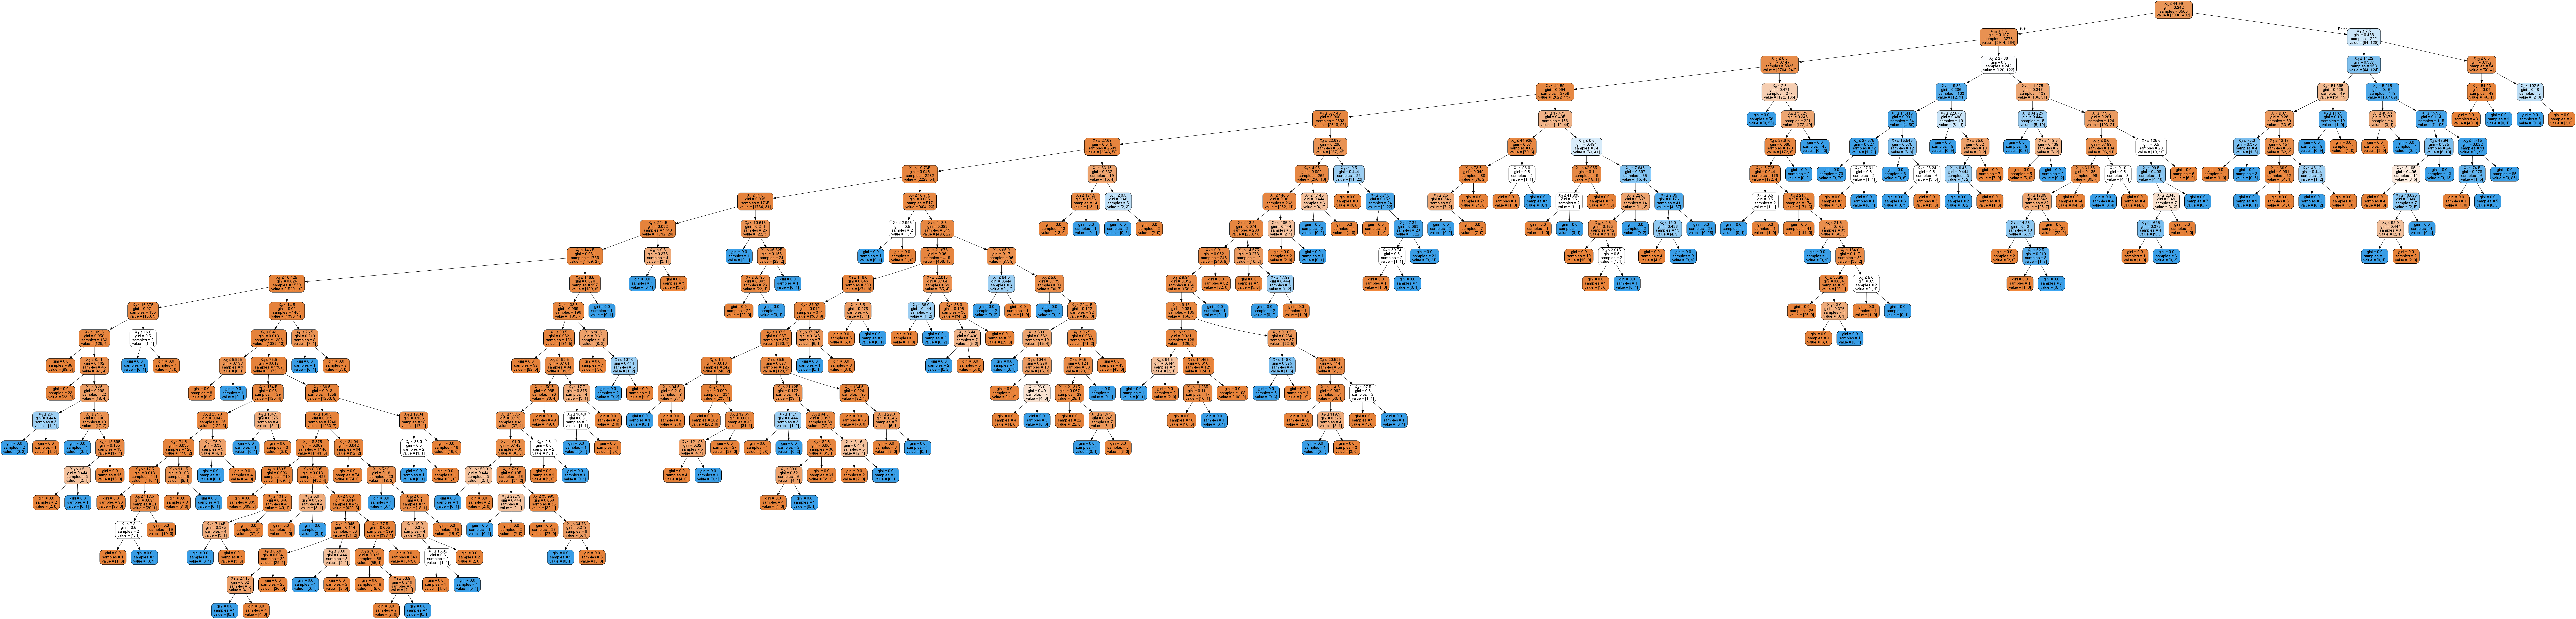

In [127]:
import pydotplus 
graphik = pydotplus.graph_from_dot_data(dot_data)
Image(graphik.create_png()) 

#create pdf 
#graphik.write_pdf('churn.pdf') 

#create png file
#graphik.write_png('churn.pdf') 

### i)	Perform a KNN=3 classifier. Show your classification report and confusion matrix. 

In [128]:
#Build
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
knn = KNeighborsClassifier(n_neighbors=3)
#call up the model to see the parameters you can tune (and their default settings)
print(knn)
print(scaler)

from sklearn.pipeline import make_pipeline
model_knn = make_pipeline(StandardScaler(), knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
<class 'sklearn.preprocessing.data.StandardScaler'>


### Train the knn model

In [129]:
#Train data
model_knn = model_knn.fit(features_train, target_train)

### Test the knn model

In [130]:
#Validate
target_pred_knn = model_knn.predict(features_test)

In [131]:
print("KNN Accuracy Score", accuracy_score(target_test, target_pred_knn))
print(classification_report(target_test, target_pred_knn))
print(confusion_matrix(target_test, target_pred_knn))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

KNN Accuracy Score 0.8946666666666667
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1285
           1       0.78      0.37      0.50       215

    accuracy                           0.89      1500
   macro avg       0.84      0.68      0.72      1500
weighted avg       0.89      0.89      0.88      1500

[[1263   22]
 [ 136   79]]
True Negatives:  1263
False Positives:  22
False Negatives:  136
True Positives:  79


The knn classifier correctly for k=3, identifies 37% of the customers that actually have left (recall). This  classifier is 78% correct when it predicts a customer who leaves (precision). It ends with a accuracy rate equal to 0.89.

### j)	Cross Validate your KNN - Comment on what this tells you.

Our goal here is to find the optimal value of K.

In [132]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 11)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    model_knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(model_knn, features_train, target_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.7957054879748289, 0.8571383066683925, 0.8459962355377828, 0.8617113912300158, 0.8639979335108275, 0.8642820151301527, 0.8657105865587242, 0.8640011848493223, 0.8648583370359875, 0.862571799419937]


In [133]:
# we should have 10 scores here
print('Length of list', len(k_scores))
# to get  the maximum accuracy
maxx = max(k_scores)
print('Max of list',maxx )

Length of list 10
Max of list 0.8657105865587242


Text(0, 0.5, 'Cross-validated accuracy')

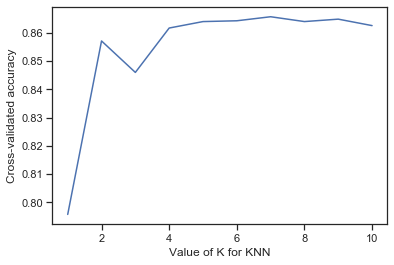

In [134]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

After running 10 values for k (1,...,10), the maximum cv accuracy occurs for k=7.

### k)	Perform another classifier of your choice. Example: logistic regression, random forest, Naïve Bayes, etc. Show your classification report and confusion matrix. Check the scikit learn documentation and Raschka textbook for code examples to deploy your chosen classification model. 

### Building Naive Bayes model:

In [135]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
print(model_nb)

GaussianNB(priors=None, var_smoothing=1e-09)


### Train the model

In [136]:
model_nb = model_nb.fit(features_train, target_train)

### Validate the model

In [137]:
#Predict clf NB model again test data
target_pred_nb = model_nb.predict(features_test)

In [138]:
print("Naive Bayes Accuracy Score", accuracy_score(target_test, target_pred_nb))
print(classification_report(target_test, target_pred_nb))
print(confusion_matrix(target_test, target_pred_nb))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_nb).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Naive Bayes Accuracy Score 0.84
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1285
           1       0.43      0.36      0.39       215

    accuracy                           0.84      1500
   macro avg       0.66      0.64      0.65      1500
weighted avg       0.83      0.84      0.83      1500

[[1182  103]
 [ 137   78]]
True Negatives:  1182
False Positives:  103
False Negatives:  137
True Positives:  78


With a accuracy rate of 0.84, Our classifier correctly identifies 43% of the customers that actually have left (recall). Also, The Naive Bayes classifier is 36% correct when it predicts a customer who leaves (precision).
We cannot really say that this classifier did it good.

Let's try the 10-fold cross-validation:

In [139]:
# 10-fold cross-validation with naive bayes
scores_nb = cross_val_score(model_nb, features_train, target_train, cv=10, scoring='accuracy')
print("Cross Validation Score for each K", scores_nb)
scores_nb.mean() 

Cross Validation Score for each K [0.88888889 0.85754986 0.84285714 0.84571429 0.87428571 0.84285714
 0.84857143 0.82       0.84240688 0.85386819]


0.8516999532357697

### Building  Logit model:

In [140]:
#logistic regression classifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.ticker

model_logit = LogisticRegression()

#Call up the model to see the parameters you can tune (and their default setting)
print(model_logit)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [141]:
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-1, 1, 10),
    'solver' : ['liblinear']}

gs = GridSearchCV(model_logit, param_grid, cv=10, n_jobs=-1, verbose=0, scoring="recall")

gs.fit(features_train, target_train)

target_pred_logit = gs.decision_function(features_test)

precision, recall, thresholds = precision_recall_curve(target_test, target_pred_logit)

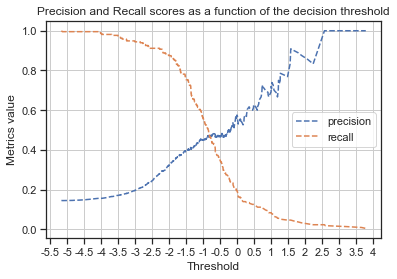

In [142]:
plt.plot(thresholds, precision[:len(precision)-1], label='precision', ls = 'dashed')
plt.plot(thresholds, recall[:len(recall)-1], label='recall', ls = 'dashed')
plt.legend()
plt.title('Precision and Recall scores as a function of the decision threshold')
plt.xlabel('Threshold')
plt.ylabel('Metrics value')
plt.grid()

#axes
ax=plt.gca()

f = lambda x,pos: str(x).rstrip('0').rstrip('.')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(f))
plt.show()


We want the recall as high possible while making sure precision is not too low. When looking at the precision and recall curve, a threshold = -1.5 allows us to reach a score of more than 75% while making sure precision is not too low (minimum 40%).

In [143]:
target_pred_logit = (gs.decision_function(features_test) >= -1.5).astype(bool) #this computes a new set of y_pred based on a
                                                                #different threshold, which we set on the decision function 
scores_logit = accuracy_score(target_test, target_pred_logit)
print("LR Accuracy Score", scores_logit)
print(classification_report(target_test, target_pred_logit))
print(confusion_matrix(target_test, target_pred_logit))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_pred_logit).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

LR Accuracy Score 0.7973333333333333
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1285
           1       0.39      0.75      0.52       215

    accuracy                           0.80      1500
   macro avg       0.67      0.78      0.69      1500
weighted avg       0.87      0.80      0.82      1500

[[1034  251]
 [  53  162]]
True Negatives:  1034
False Positives:  251
False Negatives:  53
True Positives:  162


The accuracy rate is 0.8. Our new classifier reached a recall score of 75% with a precision score of 39%. It allowed
us to to spot 162 out of the 215 churning customers. Hence we would only need to spend extra money 
to replace 53 customers in comparison to the previous cases. Furthermore, 251 out of the 1285 non-churning
customers were classified as churning ones by our classifier.

### l)	Which classifier perform the best? Justify your answer. 

In [144]:
print("Decision Tree Accuracy Score", round(scores_dt.mean(),2))
print("KNN Accuracy Score", round(maxx,2))
print("Naive Bayes Accuracy Score", round(scores_nb.mean(),2))
print("Logit Regression Accuracy Score", round(scores_logit,2))

Decision Tree Accuracy Score 0.92
KNN Accuracy Score 0.87
Naive Bayes Accuracy Score 0.85
Logit Regression Accuracy Score 0.8


#### With 92% of accuracy rate we can conclude that the Decision Tree Model is likely a better choice than the other classifiers. This classifier also has good precision, recall scores.   

Thank you !